<a href="https://colab.research.google.com/github/AdrianUrbanski/ADM/blob/main/lista3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assignment 1

## a)

In [20]:
def subsequence_dist(timeseries, shapelet):
    best_dist = np.infty

    for start in range(len(timeseries) - len(shapelet) + 1):
        dist = np.sum((timeseries[start:start + len(shapelet)] - shapelet)**2)
        if dist < best_dist:
            best_dist = dist

    return best_dist

In [43]:
def info_gain(distances, labels, split):
    def entropy(labels):
        p_A = (labels == 0).sum() / len(labels)
        p_B = (labels == 1).sum() / len(labels)
        return -(p_A*np.log(p_A + np.exp(-100)) + p_B*np.log(p_B + np.exp(-100)))
        
    labels_1 = labels[np.where(distances < split)]
    fraction_1 = len(labels_1) / len(labels)
    labels_2 = labels[np.where(distances >= split)]
    fraction_2 = len(labels_2) / len(labels)

    if fraction_1 == 0 or fraction_2 == 0:
        return 0

    return entropy(labels) - (fraction_1*entropy(labels_1) + fraction_2*entropy(labels_2))

In [69]:
def finding_shapelet_bf(dataset, labels, minlen, maxlen, n_best=1):
    def generate_candidates(dataset, minlen, maxlen):
        pool = set()
        for timeseries in dataset:
            for shapelet_length in range(minlen, maxlen+1):
                for start in range(len(timeseries) - shapelet_length + 1):
                    pool.add(tuple(timeseries[start:start+shapelet_length]))
        return pool

    def calculate_information_gain(distances, labels):
        best_gain = 0
        for split_point in np.unique(distances):
            gain = info_gain(distances, labels, split_point)
            if gain > best_gain:
                best_gain = gain

        return best_gain

    def check_candidate(dataset, shapelet, labels):
        distances = np.zeros(dataset.shape[0])
        for ts_idx in range(dataset.shape[0]):
            distances[ts_idx] = subsequence_dist(dataset[ts_idx], shapelet)

        return calculate_information_gain(distances, labels)

    candidates = generate_candidates(dataset, minlen, maxlen)

    gains = np.zeros(len(candidates))

    best_gain = 0
    best_shapelet = None

    for shapelet in candidates:
        gain = check_candidate(dataset, shapelet, labels)
        if gain > best_gain:
            best_gain = gain
            best_shapelet = shapelet

    return best_shapelet

## b)

In [81]:
def generate_time_series(len=150, alpha=0.995):
    s = np.empty(len, dtype=float)
    s[0] = 0
    momentum = 0
    for pos in range(1, len):
        momentum = alpha*momentum + np.random.normal(0, 1)
        s[pos] = s[pos-1] + momentum
    s -= np.min(s)
    s /= np.max(s)
    return s

In [82]:
def make_random_copy(s, len=100):
    base_len = s.shape[0]
    start = np.random.choice(base_len - len)
    return s[start: start+len]

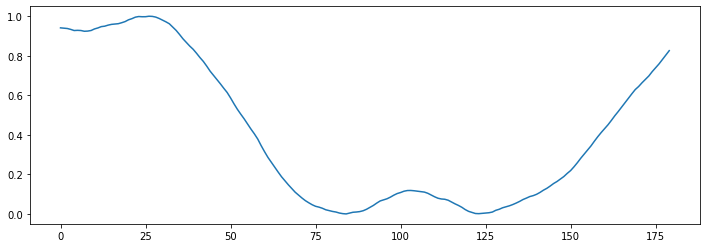

In [85]:
plt.figure(figsize=(12,4))
base_time_series = generate_time_series(len=180)
plt.plot(base_time_series)

(0.0, 1.0)

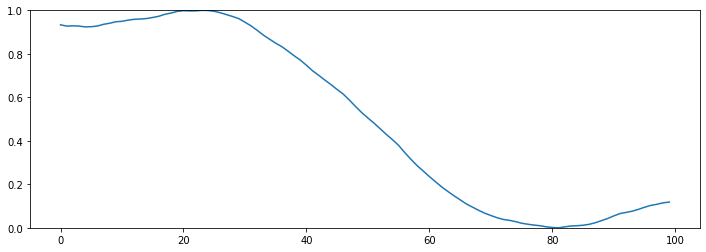

In [96]:
plt.figure(figsize=(12,4))
plt.plot(make_random_copy(base_time_series, len=100))
plt.ylim((0, 1))

In [109]:
copies_count = 30
len_base = 90
len_copy = 50

ts1, ts2 = generate_time_series(len=len_base), generate_time_series(len=len_base)

dataset = np.empty((2*copies_count, len_copy))
labels = np.hstack((np.zeros(copies_count),
                    np.ones(copies_count)))

for copy_idx in range(copies_count):
    dataset[copy_idx] = make_random_copy(ts1, len=len_copy)
    dataset[copies_count + copy_idx] = make_random_copy(ts2, len=len_copy)

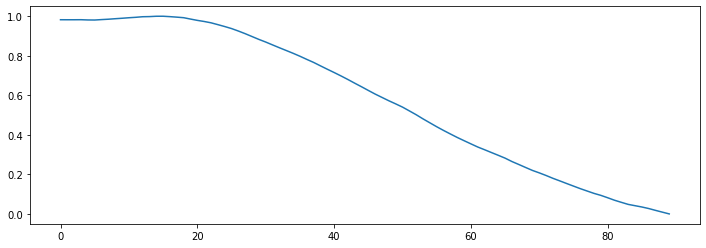

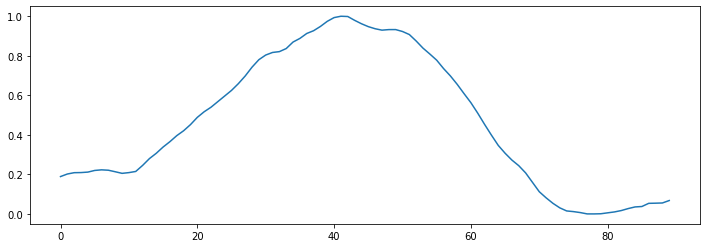

In [110]:
plt.figure(figsize=(12,4))
plt.plot(ts1)
plt.figure(figsize=(12,4))
plt.plot(ts2)

In [114]:
shapelet = finding_shapelet_bf(dataset, labels, 10, 10)

0.0014155953940940863
0.0


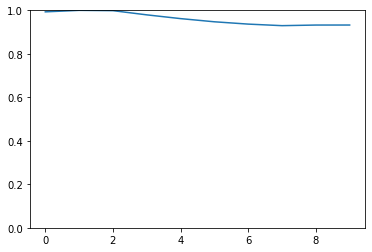

In [118]:
plt.plot(shapelet)
plt.ylim((0, 1))

print(subsequence_dist(ts1, shapelet))
print(subsequence_dist(ts2, shapelet))